# Выявление закономерностей успешности игры

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.  
Даны данные до 2016 года, и мы планируем кампанию на 2017-й.  

Описание данных games.csv
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы долларов)
- EU_sales — продажи в Европе (миллионы долларов)
- JP_sales — продажи в Японии (миллионы долларов)
- Other_sales — продажи в других странах (миллионы долларов)
- Critic_Score — оценка критиков (от 0 до 100)
- User_Score — оценка пользователей (от 0 до 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

In [1]:
# импорт нужных библ
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
import warnings
warnings.filterwarnings("ignore")

### Шаг 2. Откройте файл с данными и изучите общую информацию

In [2]:
df = pd.read_csv('./games.csv')

In [3]:
# смотрим на данные
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Есть пропуски в данных и типы данных не везде соответствуют (пр.User_Score - object, а хотелось бы float64)  
Возможные причины пропусков:  
В Name, Genre, Year_of_Release пропуски скорее всего польностью случайные (возможно не внесли информацию об этих 2х наблюдениях). Такие пропуски можно оставить без изменений (не обрабатывать).  
В Critic_Score, User_Score, Rating пропуски не случайные. Скорее всего не было оценок этих игр, но были их продажи, поэтому там намеренно пропуск. Этих пропусков много и сложно будет их восстановить, поэтому оставим их без изменений.

### Шаг 3. Подготовьте данные

##### Замените названия столбцов (приведите к нижнему регистру)

In [5]:
df.columns #старые названия

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [6]:
df.columns = [i.lower() for i in df.columns]

In [7]:
df.columns # новые названия с маленькой буквы

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [8]:
df.head() # теперь с этим работаем далее

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


##### Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему

In [9]:
df.user_score.value_counts() # все данные числа - приведем к формату float

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
9.6       2
0.9       2
2.3       2
9.7       1
0         1
Name: user_score, Length: 96, dtype: int64

In [10]:
df.user_score = pd.to_numeric(df.user_score, errors='coerce')

In [11]:
df.info() #теперь все числовые данные - float64, а строковые - object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Верно, по своей сути tbd и является Nan. Отлично, что определяешь неявные пропущенные значения. Данный метод позволяет нам перевести все нечисловые значения как раз в пропуск.

</div>

##### Обработайте пропуски при необходимости:
Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;  
Опишите причины, которые могли привести к пропускам;  
Обратите внимание на аббревиатуру 'tbd' в столбцах с рейтингом. Поясните, как обработать это значение.

In [12]:
#заменим пропуск в годах 0 и приведем все к целому типу, чтобы года были без дробей
df.year_of_release = df.year_of_release.fillna(0).astype(int)

In [13]:
# пойдем по порядку и посмотрим на все столбцы с пропусками
#name
print(df.groupby('name')['name'].count())
df.groupby('name')['name'].count().max()

name
 Beyblade Burst                 1
 Fire Emblem Fates              1
 Frozen: Olaf's Quest           2
 Haikyu!! Cross Team Match!     1
 Tales of Xillia 2              1
                               ..
thinkSMART: Chess for Kids      1
uDraw Studio                    1
uDraw Studio: Instant Artist    2
wwe Smackdown vs. Raw 2006      1
¡Shin Chan Flipa en colores!    1
Name: name, Length: 11559, dtype: int64


12

каждое имя уникально или редко повторяется (максимум 12 раз), 2 пропуска трогать не будем - это не даст важной инфы  
причины пропусков полностью случайные (не было имени или забыли внести)

In [14]:
#genre
df[df['genre'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


видим, что в 5 столбцах у нас есть пропуски в этих двух строках  
причины пропусков полностью случайные и совпадают с пропусками в имени  
оставим строки без изменений, так как в них есть продажи (то удалять не будем, чтобы данные по продажам не потерять), но пропуски в имени и жанре не будем заполнять

In [15]:
#df = df.drop(df[df['genre'].isnull()].index).reset_index(drop=True)

In [15]:
#critic_score
print(df.groupby('critic_score')['critic_score'].count().sum())
df.groupby('critic_score')['critic_score'].count().max()

8137


256

всего 8137 уникальных значений  
наиболее частое значение поворятся 256 раз  

In [16]:
df.critic_score.isnull().sum()

8578

8578 пропусков  
причины пропусков - скорее всего не было поставлено critic_score, просто игры остались без оценки

68.96767850559173
71.0


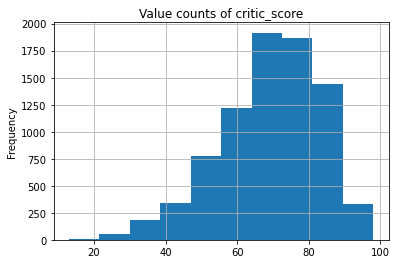

In [17]:
print(df.critic_score.mean())
print(df.critic_score.median())
df.critic_score.plot(kind='hist',title='Value counts of critic_score', grid=True)

critic_score распределен с перекосом вправо, не будем заполнять пропуски, так как их очень много и сложно их восстановить

In [19]:
#df.critic_score = df.critic_score.fillna(70.0) 

In [18]:
#user_score 
print(df.groupby('user_score')['user_score'].count().sum())
df.groupby('user_score')['user_score'].count().max()

7590


324

7590 уникальных значений  
324 раза наиболее часто встречается одно и то же значение  

In [19]:
df.user_score.isnull().sum()

9125

9125 пропусков   
причины пропусков аналогичны предыдущему critic_score

7.1250461133070315
7.5


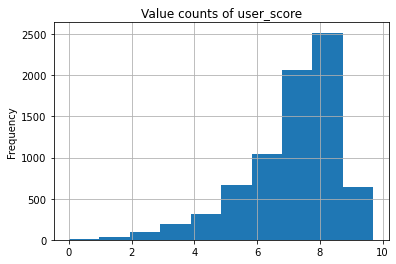

In [20]:
print(df.user_score.mean())
print(df.user_score.median())
df.user_score.plot(kind='hist',title='Value counts of user_score', grid=True)

user_score распределен еще с большим перекосом вправа, чем скор критиков. Оставим пока его тоже без изменений, так как пропусков очень много и их сложно восстановить.

In [23]:
#df.user_score = df.user_score.fillna(df.user_score.median())

<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>

Заполнение такого числа пропусков в отзывах критиков и пользователей одним значением может сильно исказить структуры данных столбцов. Данных для того, чтобы восстановить эти пропуски, у нас недостаточно. Также мы видим, что пропуски в столбцах часто встречаются вместе, т.е. нет данных по одним и тем же играм. Это с большой долей вероятности связано с тем, что эти данные просто не были загружены в таблицу. Попробуй оставить пропуски и посмотреть на результаты без их заполнения. 

</div>

In [21]:
#rating 
print(df.groupby('rating')['rating'].count().sum())
df.groupby('rating')['rating'].count().max()

9949


3990

9949 уникальных значений  
3990 раза наиболее часто встречается одно и то же значение  

In [22]:
df.rating.isnull().sum()
# 6766 пропусков

6766

Text(0, 0.5, 'frequency')

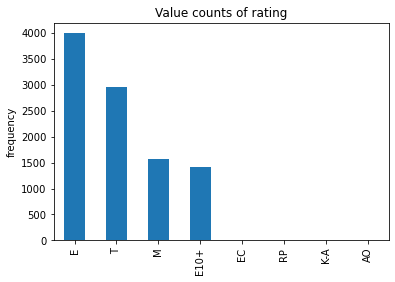

In [23]:
df.rating.value_counts().plot(kind='bar', title='Value counts of rating')
plt.ylabel("frequency")

Наиболее популярен рейтинг E.   
Пропусков довольно много и у нас недостаточно данных, чтобы их обработать без искажения существующих данных. Добавим категорию "без рейтинга" = "no_rate" на их место.

In [24]:
df.rating = df.rating.fillna("no_rate")

Text(0, 0.5, 'frequency')

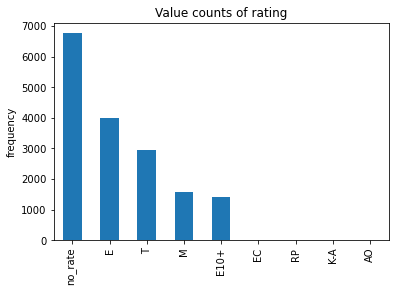

In [25]:
df.rating.value_counts().plot(kind='bar', title='Value counts of rating')
plt.ylabel("frequency")

Теперь с новой категорией мы можем видеть, что неоцененных игр доволько большая часть и смотреть, как это влияет на их продажи

In [26]:
#year_of_release
print(df.groupby('year_of_release')['year_of_release'].count().sum())
print(df[df.year_of_release == 0]['year_of_release'].count())
df.groupby('year_of_release')['year_of_release'].count().max()

16715
269


1427

здесь 269 пропусков, которые заменили на 0 ранее, чтобы привести все к целым значениям
269 - не так много от всей выборки, а заменить даты сложно чем-то, оставим их, как 0

In [27]:
# итог
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int32  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           16715 non-null  object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.3+ MB


Пропусков довольно много и с имеющимися данными мы не можем их восстановить без искажения данных. Около 8000 наблюдений у нас есть с оценками, по ним можно будет сделать вывод о влиянии рейтинга на продажи.

##### Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

In [28]:
print(f'суммарные продажи во всех регионах: {df.iloc[:, 4:8].sum().sum():.0f}')

суммарные продажи во всех регионах: 8916


### Шаг 4. Проведите исследовательский анализ данных

##### Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

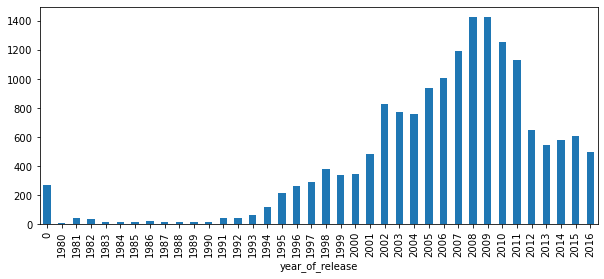

In [29]:
df.groupby('year_of_release')['year_of_release'].count().plot(kind='bar', figsize=(10,4))

до 1995 года выпускалось мало игр (менее 500), поэтому данные до 2000 года не особо важны 
(и их рейтинги уже устарели для анализа в данный момент)

Сейчас стало выходить меньше игр, так как высокие требования рынка к качеству, графике, сюжету и тд. Такие игры делать сложно и долго. Все сложнее убедить людей, что игра дейстительно им нужна, и только самые самые завоевывают внмание игроков. Поэтому уменьшенный выпуск игр скорее всего связан с высокими требованиями людей к играм в данный момент, а значит и сложностью их разработки. 

##### Посмотрите, как менялись продажи по платформам. За какой характерный период появляются новые и исчезают старые платформы?

In [30]:
df.groupby('platform')['year_of_release'].nunique().mean()

8.193548387096774

Средняя продолжительность существования платформы - 8 лет

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера 2</b></font>

Расчет приведен. Однако не стоило в него включать актуальные на настоящий момент платформы. Период их жизни еще продолжается.  

</div>

##### Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам

In [31]:
df.groupby('platform').sum().iloc[:,1:5].sum(axis=1).sort_values(ascending=False)[:10]
#выбрали 10 платформ с высокими суммарными продажами

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
dtype: float64

In [32]:
yp = pd.DataFrame(df.groupby(['year_of_release', 'platform']).sum().iloc[:,0:4].sum(axis=1)).reset_index(col_level=True)
yp.columns = ['year_of_release', 'platform', 'sum_sales']
yp = yp[yp['year_of_release'] != 0].reset_index(drop=True) # убрали пропуски из анализа
yp.head() # суммы продаж по годам у каждой платформы

,year_of_release,platform,sum_sales
0,1980,2600,11.38
1,1981,2600,35.68
2,1982,2600,28.88
3,1983,2600,5.84
4,1983,NES,10.96


In [33]:
# построим распределения продаж всех топ 10 платформ по годам
def sales_per_year(pl):
    yp[yp.platform == pl].iloc[:,0::2].plot(x='year_of_release', y='sum_sales', kind='bar', title=pl)

In [34]:
platform_leaders = ['PS2','X360','PS3','Wii','DS','PS','GBA','PS4','PSP','PC']

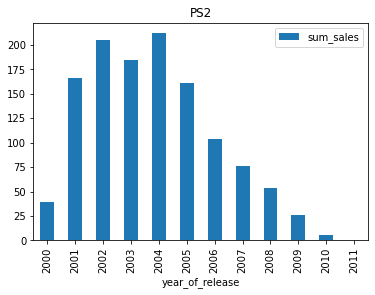

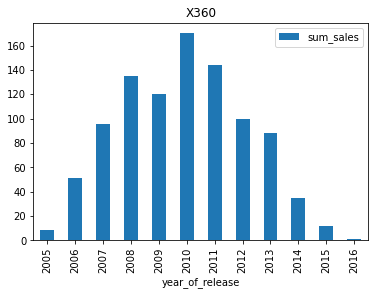

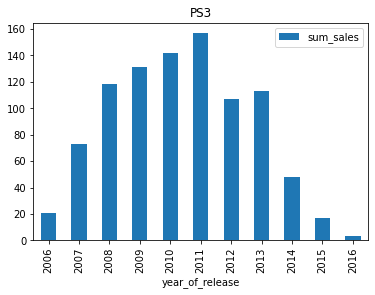

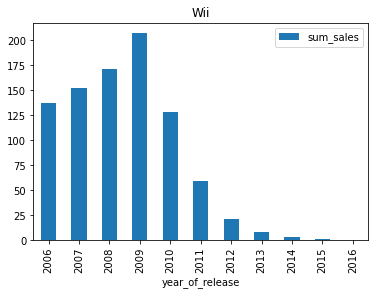

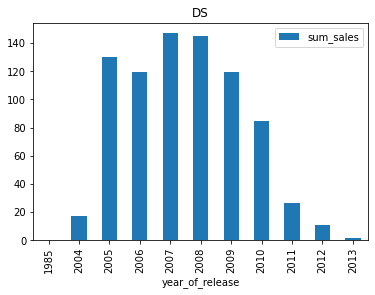

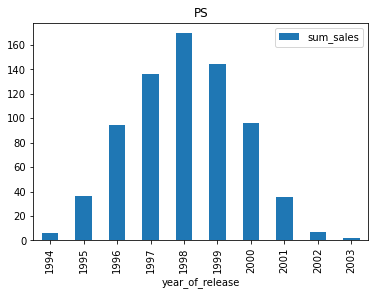

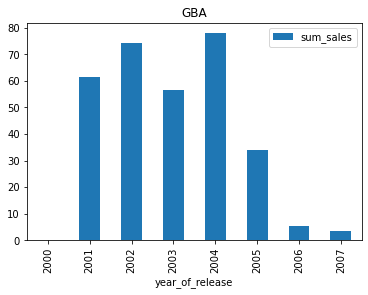

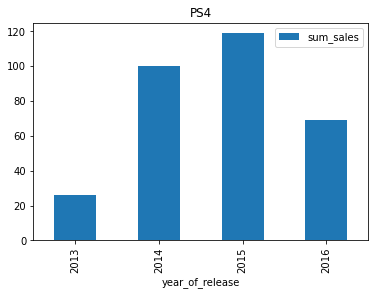

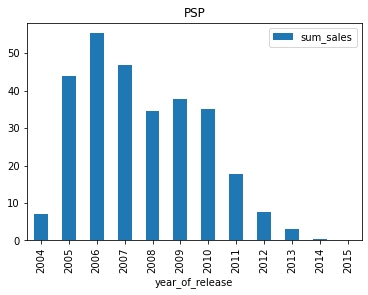

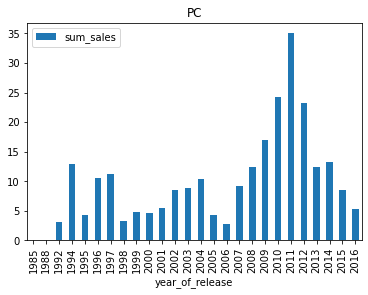

In [35]:
# графики распределений по годам сумм продаж для платформ лидеров по продажам
for name in platform_leaders:
    sales_per_year(name)
# высокие продажи в основном с 2001 по 2016 года

In [36]:
#посмотрим на каждый год и продажи по платформам
def year_sales(year):
    yp[yp['year_of_release'] == year].plot(x='platform', y='sum_sales', kind='bar', title=year)

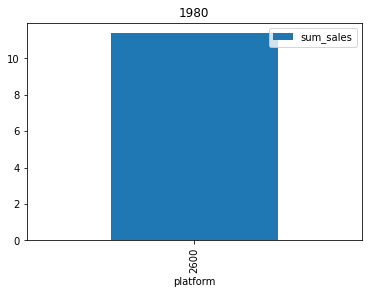

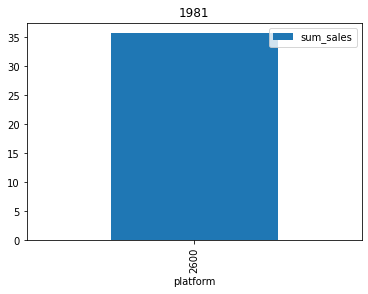

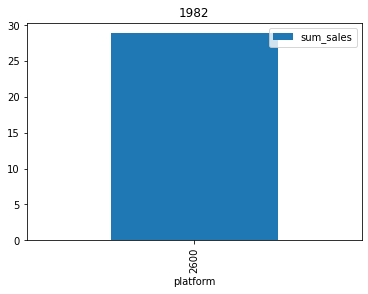

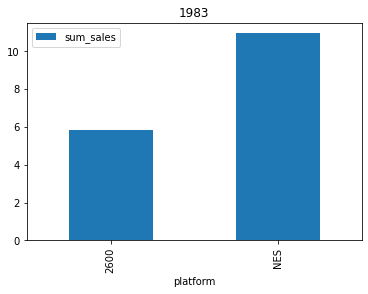

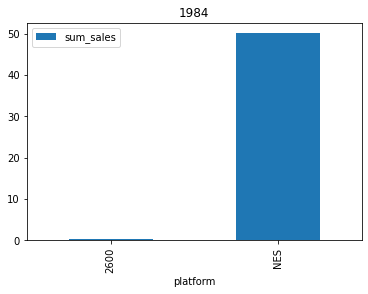

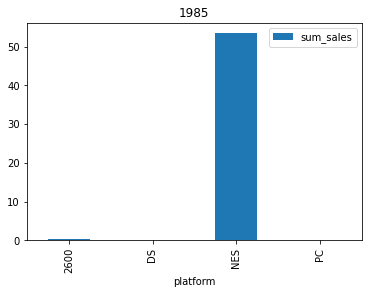

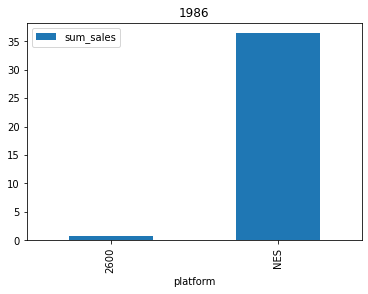

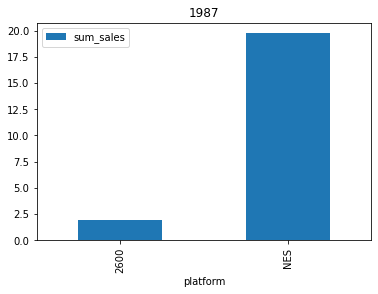

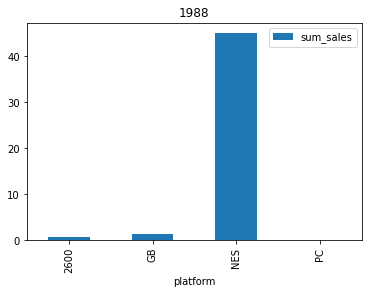

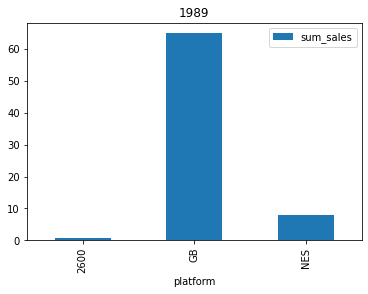

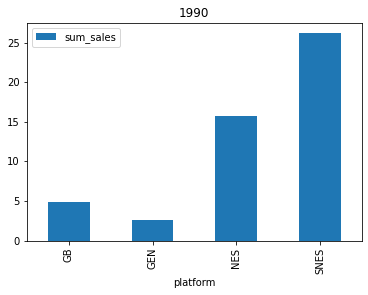

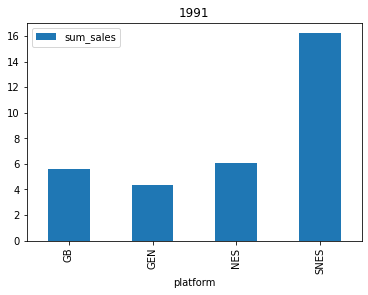

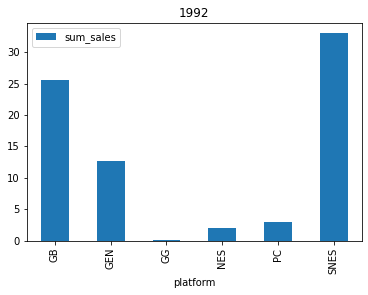

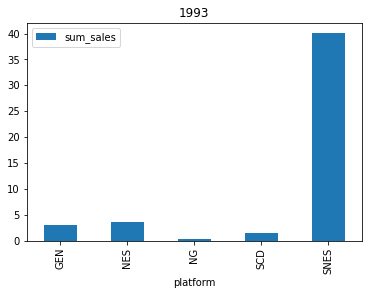

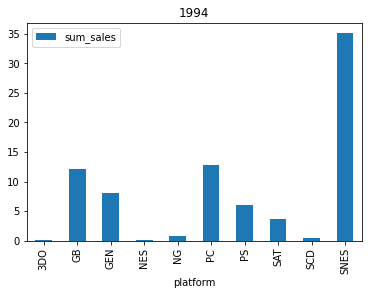

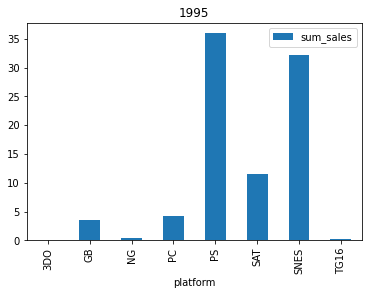

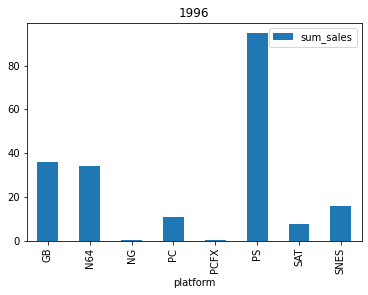

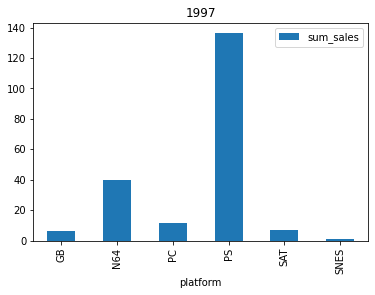

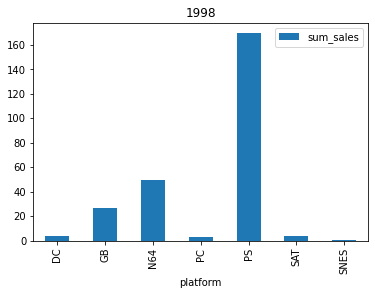

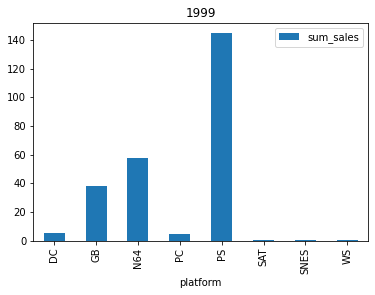

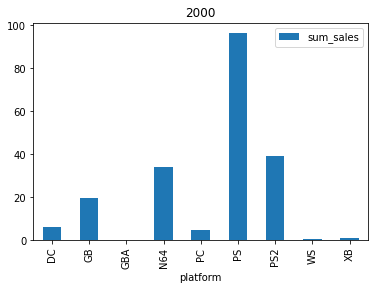

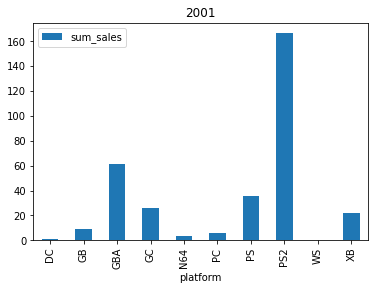

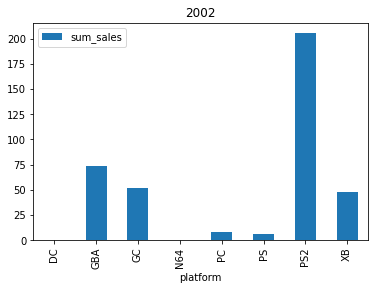

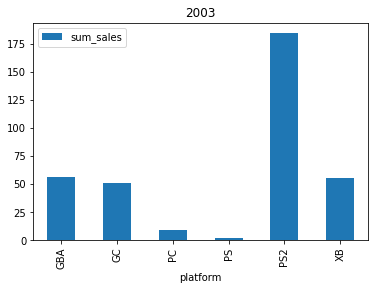

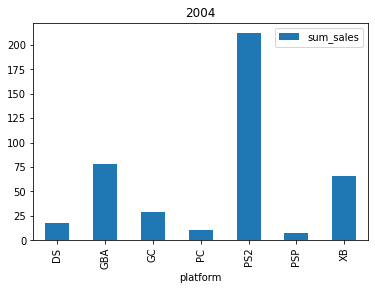

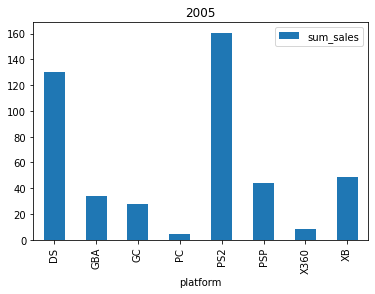

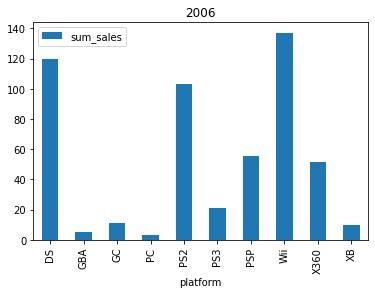

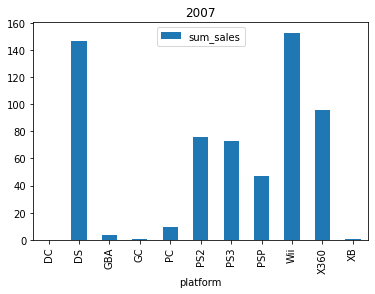

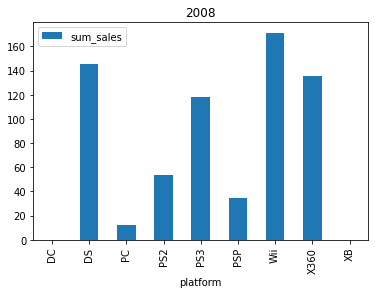

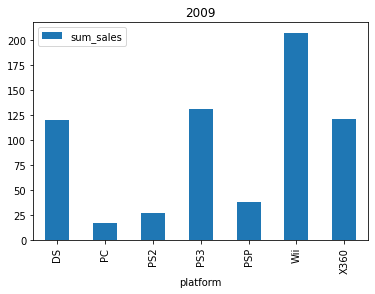

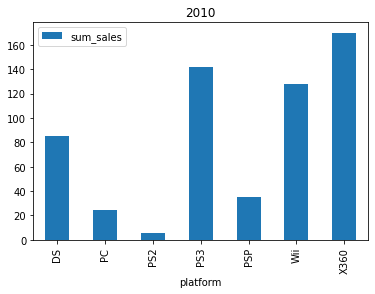

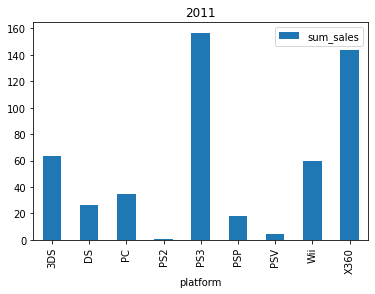

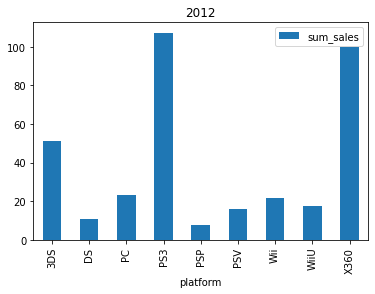

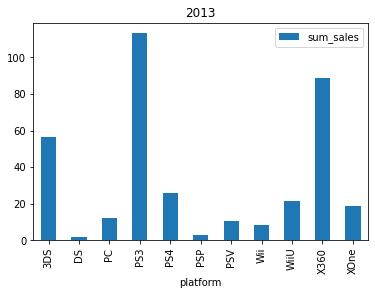

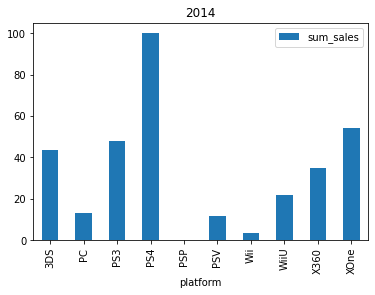

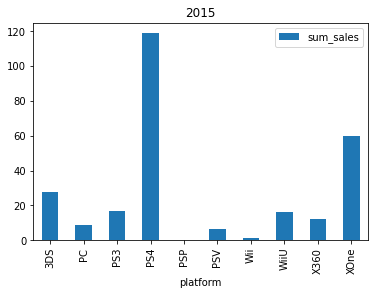

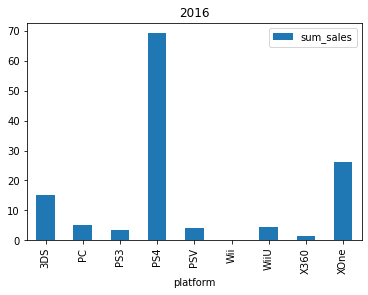

In [37]:
for y in yp['year_of_release'].unique():
    year_sales(y)

##### Найдите популярные в прошлом платформы, у которых сейчас продажи на нуле.

In [38]:
# платформы с продажами до 2000 года (в прошлом)
yp[yp['year_of_release'] <= 2000].groupby('platform')['sum_sales'].sum().sort_values(ascending=False)[:12]

platform
PS      683.25
NES     251.05
GB      245.19
N64     214.68
SNES    200.04
2600     86.48
PC       54.70
PS2      39.17
SAT      33.59
GEN      30.77
DC       14.53
SCD       1.86
Name: sum_sales, dtype: float64

In [39]:
# платформы с продажами сейчас 
yp[yp['year_of_release'] >= 2010].groupby('platform')['sum_sales'].sum().sort_values(ascending=False)

platform
PS3     587.74
X360    550.41
PS4     314.14
3DS     257.81
Wii     222.97
XOne    159.32
DS      123.75
PC      121.96
WiiU     82.19
PSP      64.05
PSV      53.81
PS2       6.09
Name: sum_sales, dtype: float64

In [40]:
old = yp[yp['year_of_release'] <= 2000].groupby('platform')['sum_sales'].sum().sort_values(ascending=False)[:12].index
new = yp[yp['year_of_release'] >= 2010].groupby('platform')['sum_sales'].sum().sort_values(ascending=False).index

In [41]:
print('популярные платформы в прошлом, у которых сейчас продажи на нуле:')
for i in old:
    if i not in new:
        print(i)

популярные платформы в прошлом, у которых сейчас продажи на нуле:
PS
NES
GB
N64
SNES
2600
SAT
GEN
DC
SCD


##### Определите, данные за какой период нужно взять, чтобы исключить значимое искажение распределения по платформам в 2016 году.

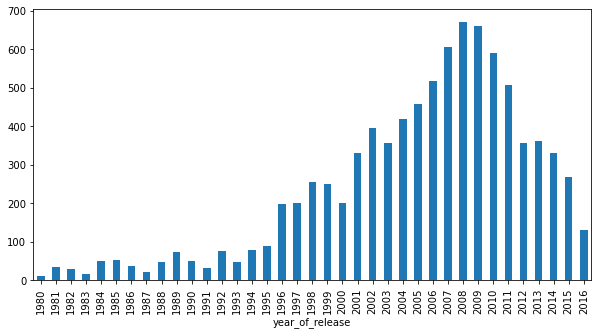

In [42]:
# посмотрим на график продаж по всем годам
x = yp.groupby('year_of_release').sum().iloc[:,0].index
y = yp.groupby('year_of_release').sum().iloc[:,0].values
yp.groupby('year_of_release').sum().iloc[:,0].plot(x=x, y=y, kind='bar', figsize=(10, 5))
# чтобы убрать сильный перекос вправо уберем продажи ранее 1996 года (их мало)

In [43]:
# Посмотрим на платформы, которые живы в 2016 году, с какого года они живут
pl16 = df[df['year_of_release'] == 2016]['platform'].unique() # платформы живущие в 2016

for i in pl16:
    print(df[(df['platform'] == i) & (df['year_of_release'] != 0)]['year_of_release'].min())
# начало старта выпуска игр на каждой из платформ, которые живы в 2016 году

2013
2011
2013
2012
2006
1985
2005
2011
2006


Так как платформы в среднем живут примерно 8 лет, и после 2008 года начинается сокращение рынка продаж (а в 2008-2009 пики продаж), то возьмем период с 2010 года, как наиболее актуальный (посткризисный) для анализа, без ярких пиков (стабильная ситуация). И примерно с этого года почти все платформы, живущие в 2016 году запускаются).

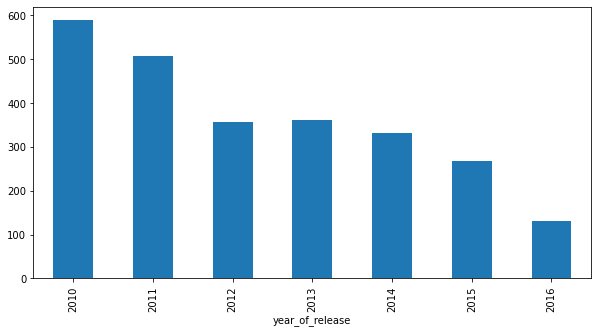

In [44]:
df_new = df.drop(df[df['year_of_release'] < 2010].index).reset_index(drop=True)
yp_new = pd.DataFrame(df_new.groupby(['year_of_release', 'platform']).sum().iloc[:,0:4].sum(axis=1)).reset_index(col_level=True)
yp_new.columns = ['year_of_release', 'platform', 'sum_sales']

x = yp_new.groupby('year_of_release').sum().iloc[:,0].index
y = yp_new.groupby('year_of_release').sum().iloc[:,0].values
yp_new.groupby('year_of_release').sum().iloc[:,0].plot(x=x, y=y, kind='bar', figsize=(10, 5))
# получили постепенный спад продаж на тех платформах, которые живы и в настоящее время

<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>

Актуальный период выделен. Лучше его уменьшить. Сейчас у тебя в периоде содержится сразу несколько этапов развития индустрии: становление рынка, рост до 2008 года, пик 2008 и 2009 годов, а также сокращение рынка последних годов. Также большей части платформ уже нет в 2016 году, в построении прогноза на 2017 год они нам не помогут. При уменьшении периода в рассмотрение попадут только последние поколения платформ, а также будем рассматривать только конечный на данный момент интервал развития игровой индустрии. 

</div>

Период рассмотрения уменьшен

##### Далее работайте только с данными, которые вы определили. Не учитывайте данные за предыдущие годы.

In [45]:
df_new.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61.0,6.3,E
1,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M
2,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M
3,Pokemon Black/Pokemon White,DS,2010,Role-Playing,5.51,3.17,5.65,0.80,NaN,NaN,no_rate
4,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M


##### Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

In [46]:
def sales_per_year_new(pl):
    yp_new[yp_new.platform == pl].iloc[:,0::2].plot(x='year_of_release', y='sum_sales', kind='bar', title=pl)

In [47]:
# лидеры по продажам
yp_new.groupby('platform')['sum_sales'].sum().sort_values(ascending=False)

platform
PS3     587.74
X360    550.41
PS4     314.14
3DS     257.81
Wii     222.97
XOne    159.32
DS      123.75
PC      121.96
WiiU     82.19
PSP      64.05
PSV      53.81
PS2       6.09
Name: sum_sales, dtype: float64

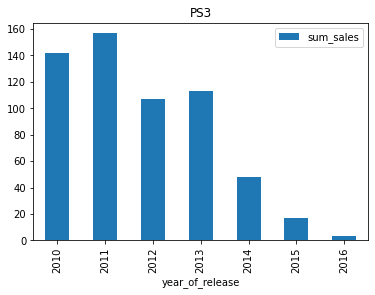

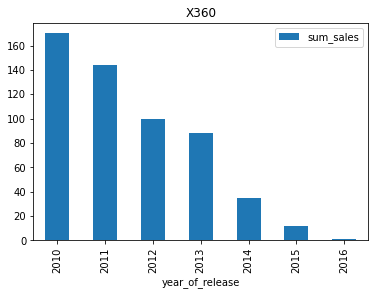

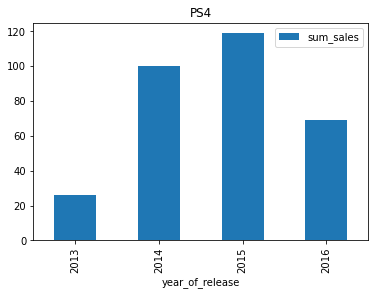

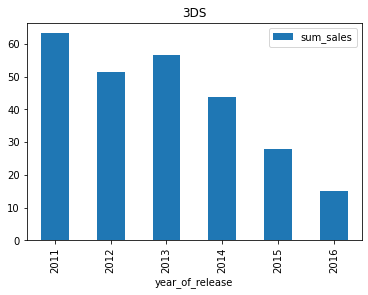

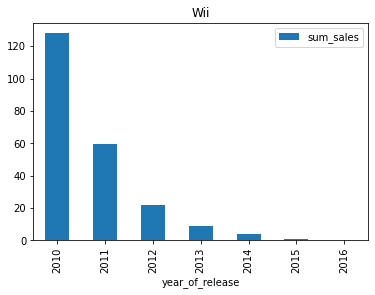

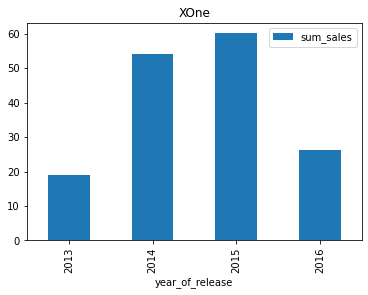

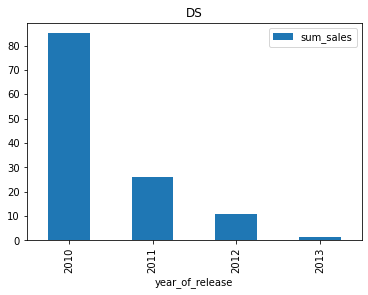

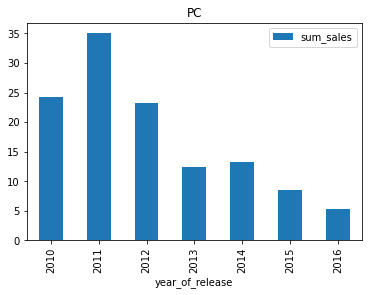

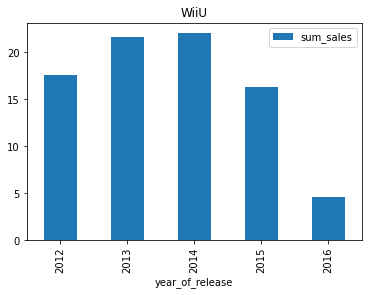

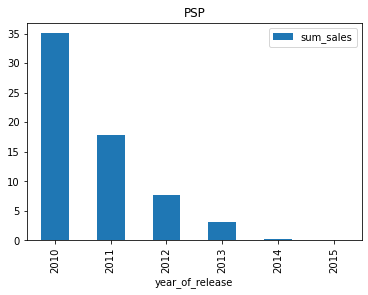

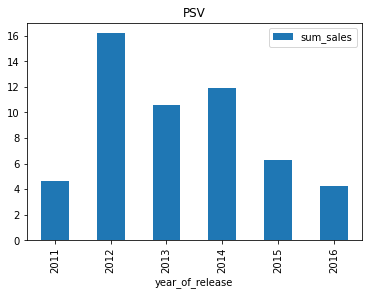

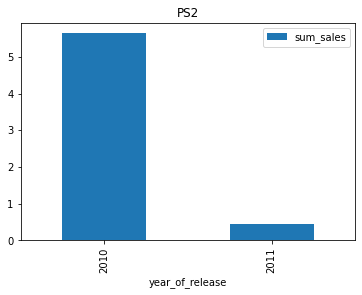

In [48]:
for name in yp_new.groupby('platform')['sum_sales'].sum().sort_values(ascending=False).index:
    sales_per_year_new(name)

все лидеры сейчас (в 2015-2016) падают по продажам по-сравнению с предыдущими годами

In [49]:
yp_new[yp_new['year_of_release'] > 2013].groupby('platform')['sum_sales'].sum().sort_values(ascending=False)

platform
PS4     288.15
XOne    140.36
3DS      86.68
PS3      68.18
X360     48.22
WiiU     42.98
PC       27.05
PSV      22.40
Wii       5.07
PSP       0.36
Name: sum_sales, dtype: float64

PS4 и XOne потенциально прибыльные платформы в настоящее время

##### Постройте график «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам. Велика ли разница в продажах? А в средних продажах на разных платформах? Опишите результат.

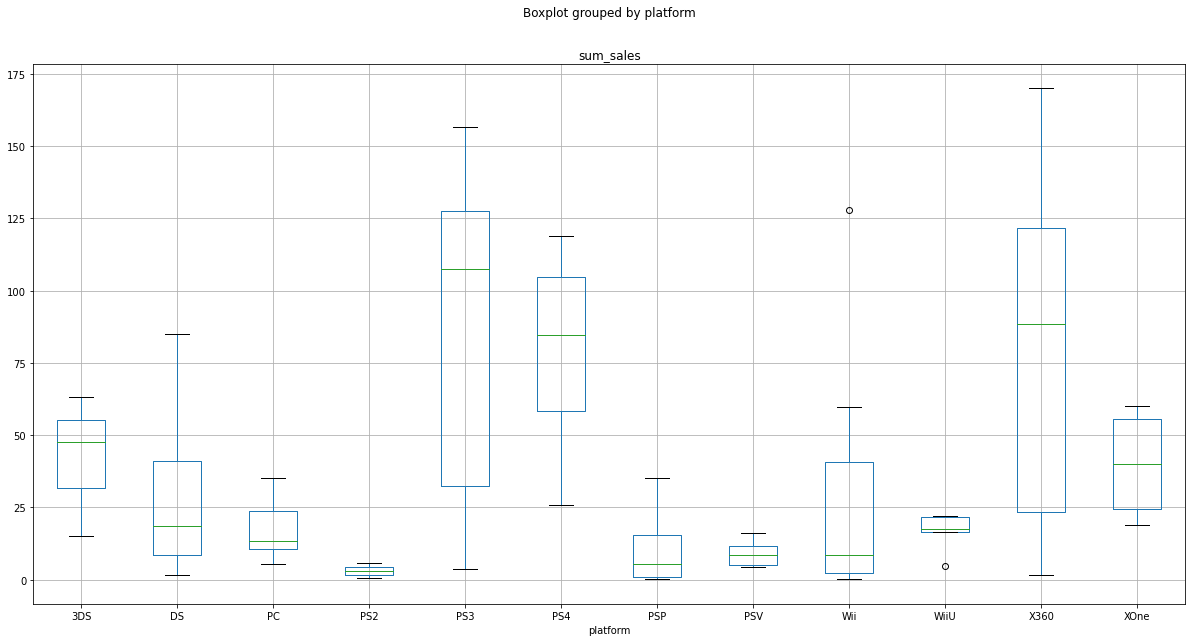

In [50]:
yp_new.boxplot(column='sum_sales', by='platform', figsize=(20,10))

У разных платформ разные продажи - разброс сильный

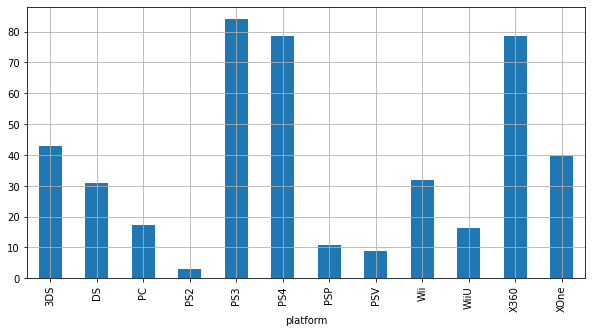

In [51]:
yp_new.groupby('platform')['sum_sales'].mean().plot(kind='bar', grid=True, figsize=(10,5))

В средних значениях продаж у платформ PS3, PS4, X360, XOne значения выше, чем у всех остальных  
Такой разброс свзан с тем, что эти платформы (PS и Xbox) сейчас лидируют на рынке и остальным сложно держать с ними конкуренцию на уровне (они скорее конкурируют между собой)

##### Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы и соотнесите их с продажами игр на других платформах.

In [52]:
# возьмем популярную сейчас PS4 для оценки влияния отзывов
ps4 = df_new[df_new['platform'] == 'PS4']
ps4['sales'] = ps4[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
ps4.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
5,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,no_rate,14.63
13,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
27,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
31,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,no_rate,7.98
32,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66


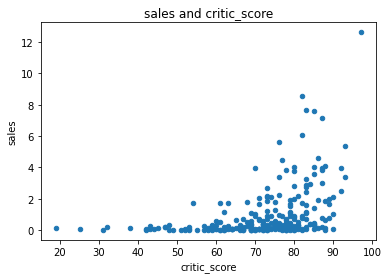

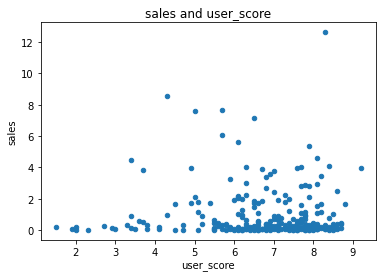

In [53]:
#диаграммы рассеяния между продажами и отзывами
ps4.plot(kind='scatter', y='sales', x='critic_score', title='sales and critic_score')
ps4.plot(kind='scatter', y='sales', x='user_score', title='sales and user_score')

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>
 
Графики стоит перевернуть. По оси X указывается независимая переменная.  

</div>

In [54]:
# корреляция
ps4[['critic_score','user_score','sales']].corr()

,critic_score,user_score,sales
critic_score,1.000000,0.557654,0.406568
user_score,0.557654,1.000000,-0.031957
sales,0.406568,-0.031957,1.000000


чем выше critic_score, тем выше продажи  
с user_score связи практически нет

In [55]:
# посмотрим на прдажи других игр на других платформах
df_new['sales'] = df_new.iloc[:,4:8].sum(axis=1)

In [56]:
df_new[['critic_score', 'user_score', 'sales']].corr()

,critic_score,user_score,sales
critic_score,1.000000,0.550646,0.317012
user_score,0.550646,1.000000,0.055365
sales,0.317012,0.055365,1.000000


Если смотреть на все вместе, то critic_score имеет меньшее влияние на продажи, чем user_score.   
Обе оценки влияют на прдажи положительно.  
скорее всего PS4 получала в основном позитивные отзывы критиков и продажи росли, а в целом продажи платформ складываются скорее из отзывов пользователей, на которые люди чаще опираются при покупке

##### Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

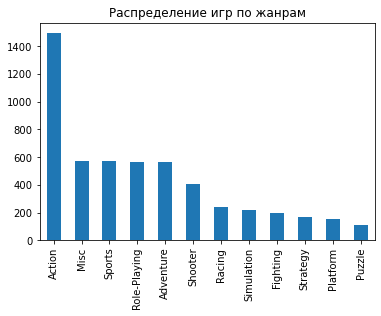

In [57]:
#распределение игр по жанрам
df_new.genre.value_counts().plot(kind='bar', title='Распределение игр по жанрам')

In [58]:
# прибыльность жанров
df_new.groupby('genre')['sales'].sum().sort_values(ascending=False)

genre
Action          673.09
Shooter         479.74
Sports          328.39
Role-Playing    315.28
Misc            234.56
Racing          122.68
Platform        119.72
Fighting         81.59
Simulation       71.75
Adventure        61.00
Strategy         35.84
Puzzle           20.60
Name: sales, dtype: float64

In [59]:
# примерная цена за штуку
(df_new.groupby('genre')['sales'].sum() / df_new.groupby('genre')['sales'].count()).sort_values(ascending=False)

genre
Shooter         1.170098
Platform        0.782484
Sports          0.571113
Role-Playing    0.555070
Racing          0.517637
Action          0.450227
Fighting        0.410000
Misc            0.407222
Simulation      0.330645
Strategy        0.210824
Puzzle          0.180702
Adventure       0.108348
Name: sales, dtype: float64

По количеству выпущенных игр лидирует жанр Action, который и является самым прибыльным, хотя имеет не самую высокую цену за штуку  
Жанры же с низкими продажами имеют и низкое число покупок и низкую цену, например Puzzle, Strategy

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Анализ популярности жанров проведен. Однако не стоит забывать, что производство игр в жанрах Action или Shooter обходится сильно дороже, чем производство Puzzle-игр. 

</div>

### Шаг 5. Составьте портрет пользователя каждого региона

##### Определите для пользователя каждого региона (NA, EU, JP):   
##### Самые популярные платформы (топ-5). Опишите различия в долях продаж.

In [60]:
def popular_platform(name, reg):
    print(f'Общие продажи для {name}:')
    display(df_new.groupby('platform')[reg].sum().sort_values(ascending=False)[:5])
    df_new.groupby('platform')[reg].sum().sort_values(ascending=False)[:5].plot(kind='bar', title=f'Общие продажи для {name}:')
    plt.show()

Общие продажи для NA:


platform
X360    334.18
PS3     229.25
Wii     121.20
PS4     108.74
XOne     93.12
Name: na_sales, dtype: float64

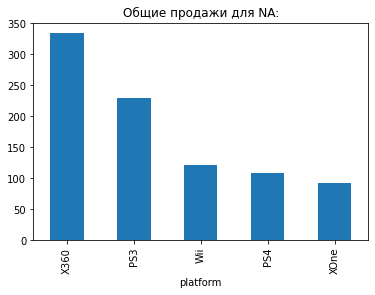


Общие продажи для EU:


platform
PS3     213.60
X360    163.41
PS4     141.09
PC       68.82
Wii      65.91
Name: eu_sales, dtype: float64

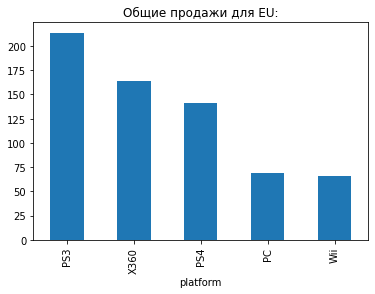


Общие продажи для JP:


platform
3DS    100.62
PS3     59.26
PSP     42.20
DS      27.90
PSV     21.84
Name: jp_sales, dtype: float64

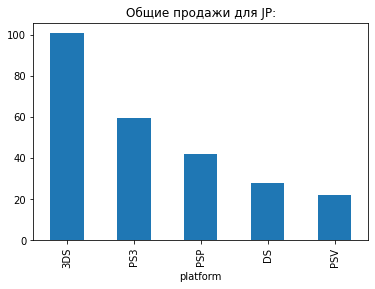

In [61]:
popular_platform('NA', 'na_sales')
print()
popular_platform('EU', 'eu_sales')
print()
popular_platform('JP', 'jp_sales')

У NA самые большие продажи, а у JP самые низкие, что может быть связано с количеством людей, живущих в регионе, или же с реакцией на рейтинг игр от критиков и пользователей (JP более чувствителен к негативному рейтингу или же менее чувствителен к позитивному рейтингу)  
Также у NA и EU в лидерах X360 и PS3, а вот у JP в лидерах 3DS, а X360 нет в топе совсем (возможно игры этой платформы не продаются в Японии (политика))

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>

Таблицы на печать выводи с помощью метода display. print переводит данные в строку, а нам этого не надо. 

</div>

##### Самые популярные жанры (топ-5). Поясните разницу.

In [62]:
def popular_genre(name, reg):
    print(f'Общие продажи для {name}:')
    display(df_new.groupby('genre')[reg].sum().sort_values(ascending=False)[:5])
    df_new.groupby('genre')[reg].sum().sort_values(ascending=False)[:5].plot(kind='bar', title=f'Общие продажи для {name}:')
    plt.show()

Общие продажи для NA:


genre
Action          290.64
Shooter         237.47
Sports          156.81
Misc            123.80
Role-Playing    112.05
Name: na_sales, dtype: float64

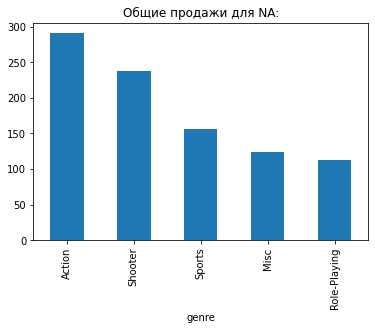


Общие продажи для EU:


genre
Action          233.63
Shooter         171.45
Sports          116.84
Role-Playing     75.48
Misc             66.09
Name: eu_sales, dtype: float64

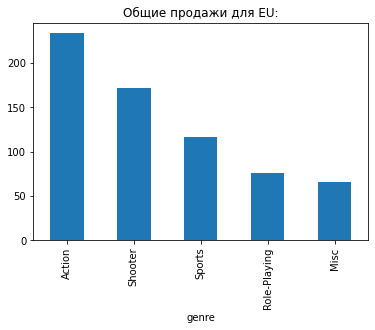


Общие продажи для JP:


genre
Role-Playing    103.54
Action           72.20
Misc             24.29
Platform         15.81
Adventure        15.67
Name: jp_sales, dtype: float64

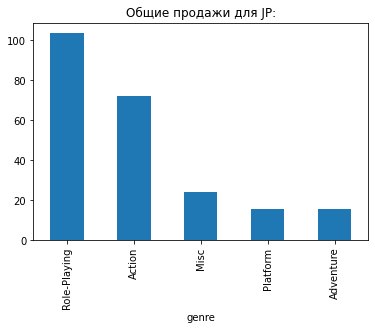

In [63]:
popular_genre('NA', 'na_sales')
print()
popular_genre('EU', 'eu_sales')
print()
popular_genre('JP', 'jp_sales')

Во всех регионах популярен Action
У NA и EU рейтинг продаж по жанрам очень похож, а вот в JP другие интересы у людей: на первом месте Role-Playing и есть еще Platform и Adventure . Скорее всего это связано со спецификой интересов людей в этом регионе, они у них отличаются от остальных регионов, а также возможно в Японии есть какие-либо ограничения на продажу определенных брендов.

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

В целом, мы можем сказать, что культуры регионов отличаются, что и сказывается на игровом рынке. 

</div>

##### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [64]:
def rating(name, reg):
    print(f'Общие продажи для {name}:')
    display(df_new.groupby('rating')[reg].sum().sort_values(ascending=False))
    df_new.groupby('rating')[reg].sum().sort_values(ascending=False).plot(kind='bar', title=f'Общие продажи для {name}:')
    plt.show()

Общие продажи для NA:


rating
M          382.22
E          271.15
T          160.81
E10+       159.38
no_rate    155.72
EC           1.13
RP           0.00
Name: na_sales, dtype: float64

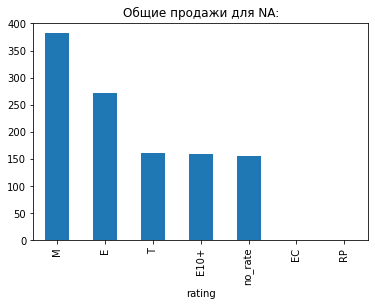


Общие продажи для EU:


rating
M          292.04
E          197.34
no_rate    139.44
T          113.08
E10+        99.28
RP           0.03
EC           0.00
Name: eu_sales, dtype: float64

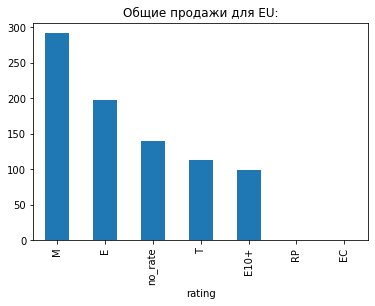


Общие продажи для JP:


rating
no_rate    171.49
E           47.87
T           42.11
M           30.45
E10+        13.22
RP           0.00
EC           0.00
Name: jp_sales, dtype: float64

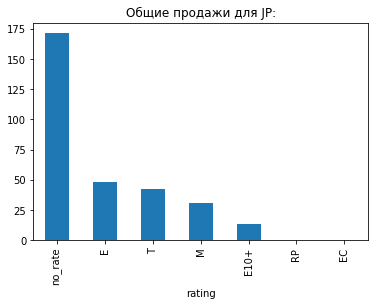

In [65]:
rating('NA', 'na_sales')
print()
rating('EU', 'eu_sales')
print()
rating('JP', 'jp_sales')

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера 2</b></font>

Или ESRB просто не проставляет рейтинг локальным японским играм. 

</div>

С рейтингом E, T, M продаж во всех регионах больше, однако влияние ли это самого рейтинга или чего-то еще сказать наверняка нельзя.  
Пропуски в данных по большей части у JP - возможно именно там стоит посмотреть корректно ли вносились данные о рейтингах, или просто JP не раскрывает эту информацию для общего пользования.

### Шаг 6. Проведите исследование статистических показателей

##### Как изменяется пользовательский рейтинг и рейтинг критиков в различных жанрах? Посчитайте среднее количество, дисперсию и стандартное отклонение. Постройте гистограммы. Опишите распределения

In [66]:
# critic_score
m = df_new.groupby('genre')['critic_score'].mean() # средний рейтинг по жанрам
d = df_new.groupby('genre')['critic_score'].var() # дисперсия по жанрам
s = df_new.groupby('genre')['critic_score'].std() # стандартное отклонение по жанрам
a = pd.concat([m,d,s], axis=1)
a.columns=['mean_critic_score', 'var_critic_score', 'std_critic_score']

# user_score
mm = df_new.groupby('genre')['user_score'].mean()
dd = df_new.groupby('genre')['user_score'].var()
ss = df_new.groupby('genre')['user_score'].std()
b = pd.concat([mm,dd,ss], axis=1)
b.columns=['mean_user_score', 'var_user_score', 'std_user_score']

pd.concat([a, b], axis=1)

,mean_critic_score,var_critic_score,std_critic_score,mean_user_score,var_user_score,std_user_score
genre,,,,,,
Action,68.889045,181.991891,13.490437,6.781900,1.850148,1.360201
Adventure,70.242424,161.042672,12.690259,7.360748,1.727313,1.314273
Fighting,70.073171,187.281487,13.685083,6.970992,1.761921,1.327374
Misc,69.021429,163.373638,12.781770,6.646853,2.249127,1.499709
Platform,74.432990,170.039734,13.039928,7.072381,2.708364,1.645711
Puzzle,71.740741,77.430199,8.799443,7.114286,1.211286,1.100584
Racing,70.739437,181.782689,13.482681,6.378082,2.580482,1.606388
Role-Playing,73.062992,147.245028,12.134456,7.283396,1.450481,1.204359
Shooter,71.881188,188.853387,13.742394,6.486068,2.355861,1.534881


Среднее скоров по жанрам колеблется в +-2 значения, но в основном находится примерно на одном уровне  
У critic_score проседает жанр Simulation и выделяется в повышенном занчении Platform	  
У user_score проседает жанр Sports (пользователи слишком предвзятые к спорт играм - хотят приближенные к реальности)

У critic_score довольно сильный разброс значений, когда у user_score он почти не наблюдается  
Все пользователи примерно одинаково оценивают жанры, а вот критики дают жанрам очень разные оценки

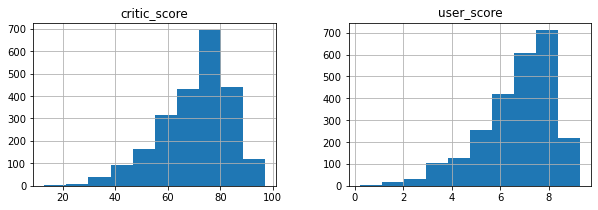

In [68]:
# гистограммы, распределения
df_new[['critic_score','user_score']].hist(figsize=(10, 3));

Распределение имеет перекос вправо, к бОльшим оценкам

<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>

Правильно, что ты заметила сильное влияние заполнения пропусков на распределения. Посмотри на графики без их заполнения. Также по заданию нас просят построить гистограммы по отзывам критиков и пользователей для каждого рассматриваемого жанра. Пожалуйста, сделай это. 

</div>

In [69]:
def genre_score(gen):
    print(gen)
    df_new[df_new['genre'] == gen][['critic_score','user_score']].hist(figsize=(10, 3))
    plt.show()

Misc


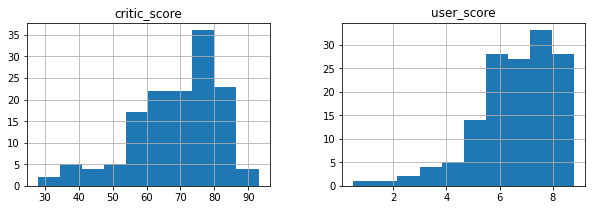

Action


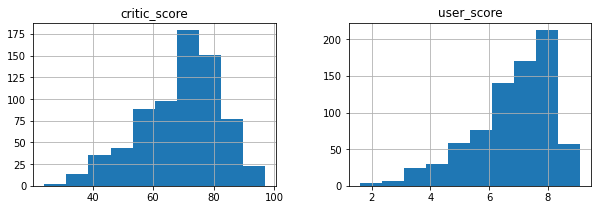

Role-Playing


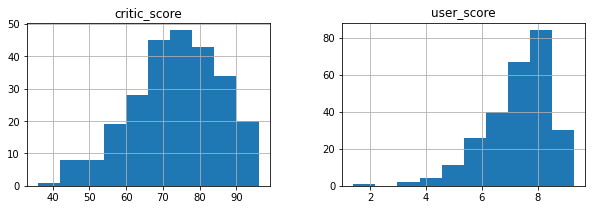

Shooter


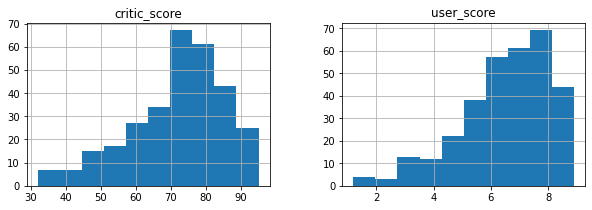

Racing


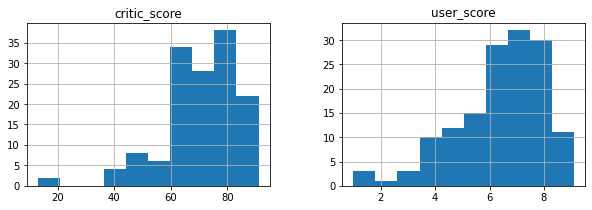

Platform


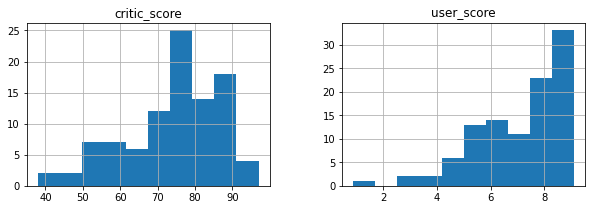

Simulation


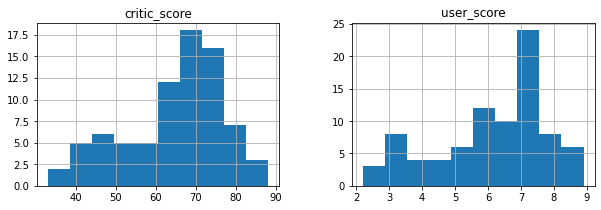

Sports


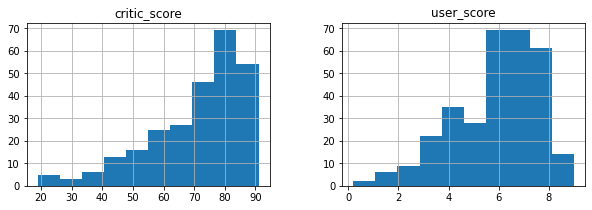

Fighting


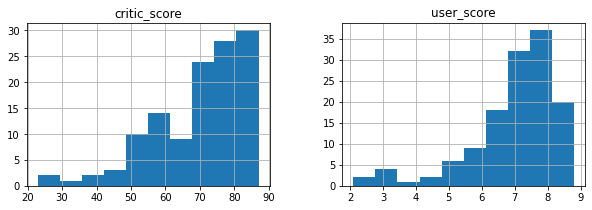

Strategy


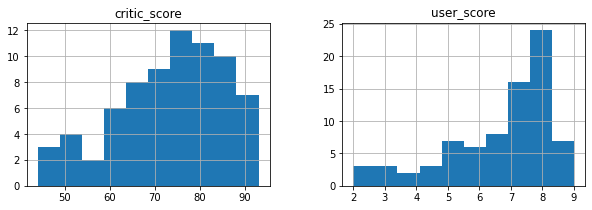

Adventure


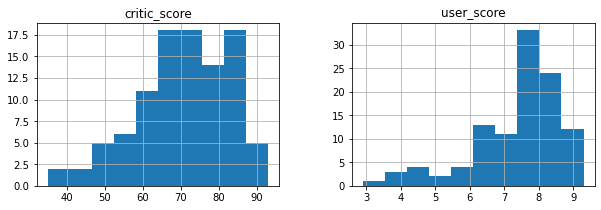

Puzzle


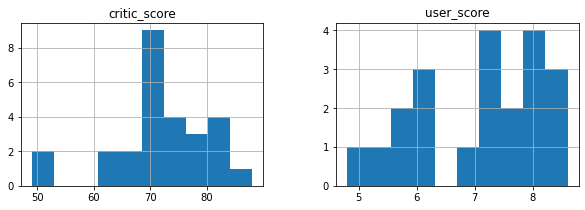

In [70]:
# гистограммы по отзывам критиков и пользователей для каждого рассматриваемого жанра
for i in df_new.genre.unique():
    genre_score(i)

В основном у всех жанров перекос вправо в распределениях оценок, однако в жанрах Strategy и Puzzle распределение оценок немного отличается от остальных (кстати эти жанры плохо продаются). Возможно пользователям не очень нравятся данные жанры, поэтому не все ставят им высокие оценки.

### Шаг 7. Проверьте гипотезы

##### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

H0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые  
HA: Средние пользовательские рейтинги платформ Xbox One и PC не одинаковые  

In [71]:
sample_1 = df_new[(df_new['platform'] == 'XOne') & ~(df_new['user_score'].isnull())]['user_score']
sample_2 = df_new[(df_new['platform'] == 'PC') & ~(df_new['user_score'].isnull())]['user_score']

In [72]:
# тест на равенство дисперсий
# H0: дисперсии выборок равны
# HA: дисперсии выборок различны
st.levene(sample_1, sample_2).pvalue

0.033971871409421345

In [75]:
# pv < 0.05 - принимаем H0, 
# значит при проверке равенства средних значений будем использовать параметр equal_var по умолчанию (True)

In [73]:
# проверка гипотезы о равенстве средних двух генеральных совокупностей
results = st.ttest_ind(sample_1, sample_2)
print('p-значение: ', results.pvalue)
print('p-значение:(%) ', results.pvalue * 100)

p-значение:  0.980998110649032
p-значение:(%)  98.0998110649032


pv больше любого из общепринятых пороговых значений — 5% и 1%, что значит, что средние пользовательские рейтинги платформ Xbox One и PC скорее всего одинаковы.   
pv более 1% и 5% - значит принимаем нулевую гипотезу о равенстве средних рейтингов в выборках.

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>

Ты верно проводишь статистические тесты. Однако важно понимать, что p-value нельзя интерпретировать как вероятность того, что наблюдения получены случайно. Если ты помотришь логику расчета результатов t-теста, то увидишь, что p-value это, в сущности, уровень статистической значимости, который нужен для того, чтобы нулевая гипотеза выполнялась для полученного наблюдения. Внутри стат. теста p-value расчитывается в предположении, что Н0 верна - это не мера случайности полученного результата, а мера того, насколько нужно раздвинуть доверительный интервал, чтобы в него попало полученное наблюдение.

</div>

##### Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные.

H0: Средние пользовательские рейтинги жанров Action и Sports одинаковые  
HA: Средние пользовательские рейтинги жанров Action и Sports разные

In [74]:
sample_1 = df_new[(df_new['genre'] == 'Action') & ~(df_new['user_score'].isnull())]['user_score']
sample_2 = df_new[(df_new['genre'] == 'Sports') & ~(df_new['user_score'].isnull())]['user_score']

In [75]:
# тест на равенство дисперсий
# H0: дисперсии выборок равны
# HA: дисперсии выборок различны
st.levene(sample_1, sample_2).pvalue

1.3235677783725728e-05

In [79]:
# pv < 0.05 - отклоняем H0, 
# значит при проверке равенства средних значений будем использовать параметр equal_var=False

In [76]:
# проверка гипотезы о равенстве средних двух генеральных совокупностей
results = st.ttest_ind(sample_1, sample_2, equal_var=False)
print('p-значение: ', results.pvalue)
print('p-значение:(%) ', results.pvalue * 100)

p-значение:  1.4516152467844418e-15
p-значение:(%)  1.4516152467844417e-13


pv близко к 0 - меньше любого из общепринятых пороговых значений — 5% и 1%, что значит, что средние пользовательские рейтинги жанров Action и Sports скорее всего различны.  
pv менее 1% и 5% - значит отклоняем нулевую гипотезу о равенстве средних рейтингов в выборках.

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>

Прежде чем произвести проверку гипотезы через T-критерий Стьюдента произведи проверку дисперсии выборок, чтобы понять с каким параметром использовать метод проверки. Уточни параметр equal_var при проведении тестов. Если при их сравнении мы получим расхождение более чем в 5%, то мы можем сказать, что дисперсии различны. Также проверить равенство дисперсий нам может помочь [такой тест](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html).

</div>

### Шаг 8. Напишите общий вывод

In [77]:
df_new.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
0,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61.0,6.3,E,21.82
1,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
2,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
3,Pokemon Black/Pokemon White,DS,2010,Role-Playing,5.51,3.17,5.65,0.80,NaN,NaN,no_rate,15.13
4,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,14.73


- до 1995 года продажи игр были очень малы, по сравнению с настоящим временем, что нет смысла включать их в анализ
- актуальный период для исслпедования лучш брать после кризиса 2008 года (в этот период как раз появляются платформы, живущие до сих пор в 2016 году)
- продажи в NA и EU занимают большую долю рынка и в этих регионах схожи интересы у людей
- сейчас две перспективные платформы занимают рынок: PS4 и XOne
- наиболее высокий спрос имеет жанр Action
- в целом продажи по всем платформам падают, по-сравнению с несколькими годами ранее (3-5 лет назад)
- оценка критиков и пользователей оказывает положительное влияние на продажи игр
- игры с рейтингом E,M,T активно продаются на рынке
- пользователи дают примерно одинаковые рейтинги платформам Xbox One и PC, значит стоит делать упор в продажах на что-то еще дополнительное (если хотим продавать игры конкретной платформы больше), например на рекламу
- Action и Sports получают разные рейтинги от пользователей, а значит люди могут активно влиять на продажу какого-то из жанров. Нужно следить за отзывами на жанры, чтобы не закупить тот жанр, который в итоге не будет продаваться из-за плохих отзывов пользователей